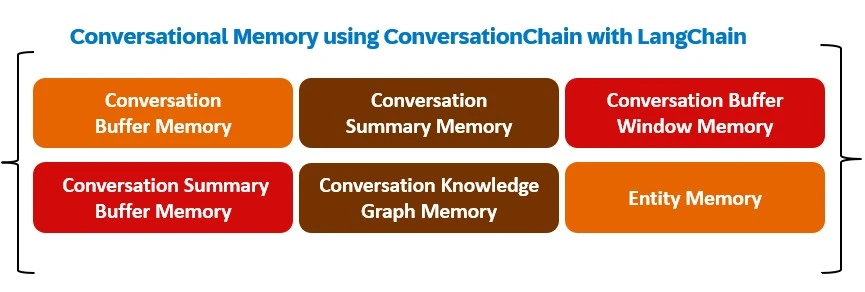

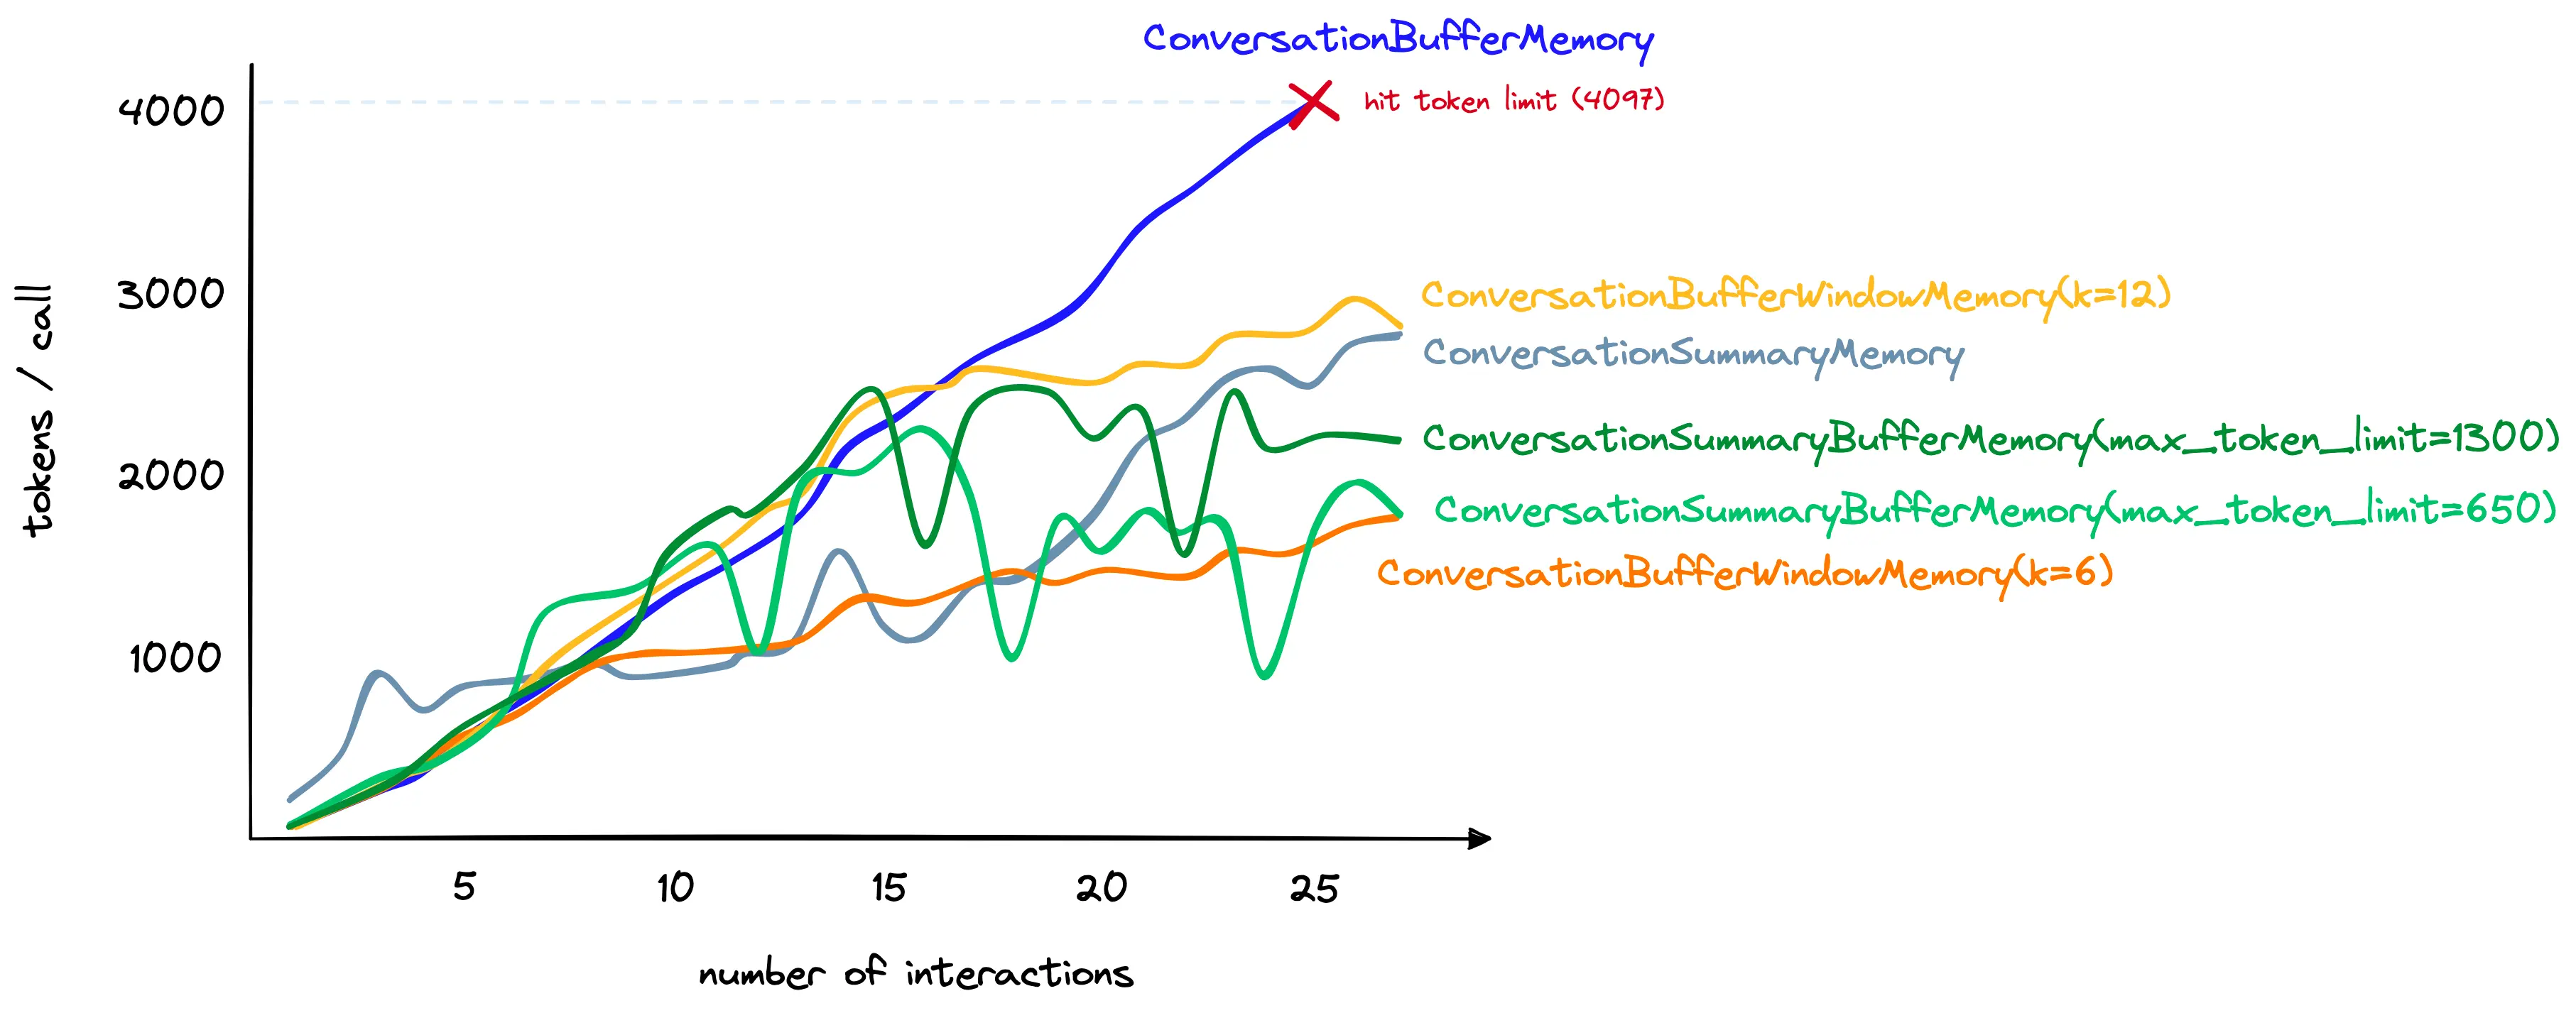

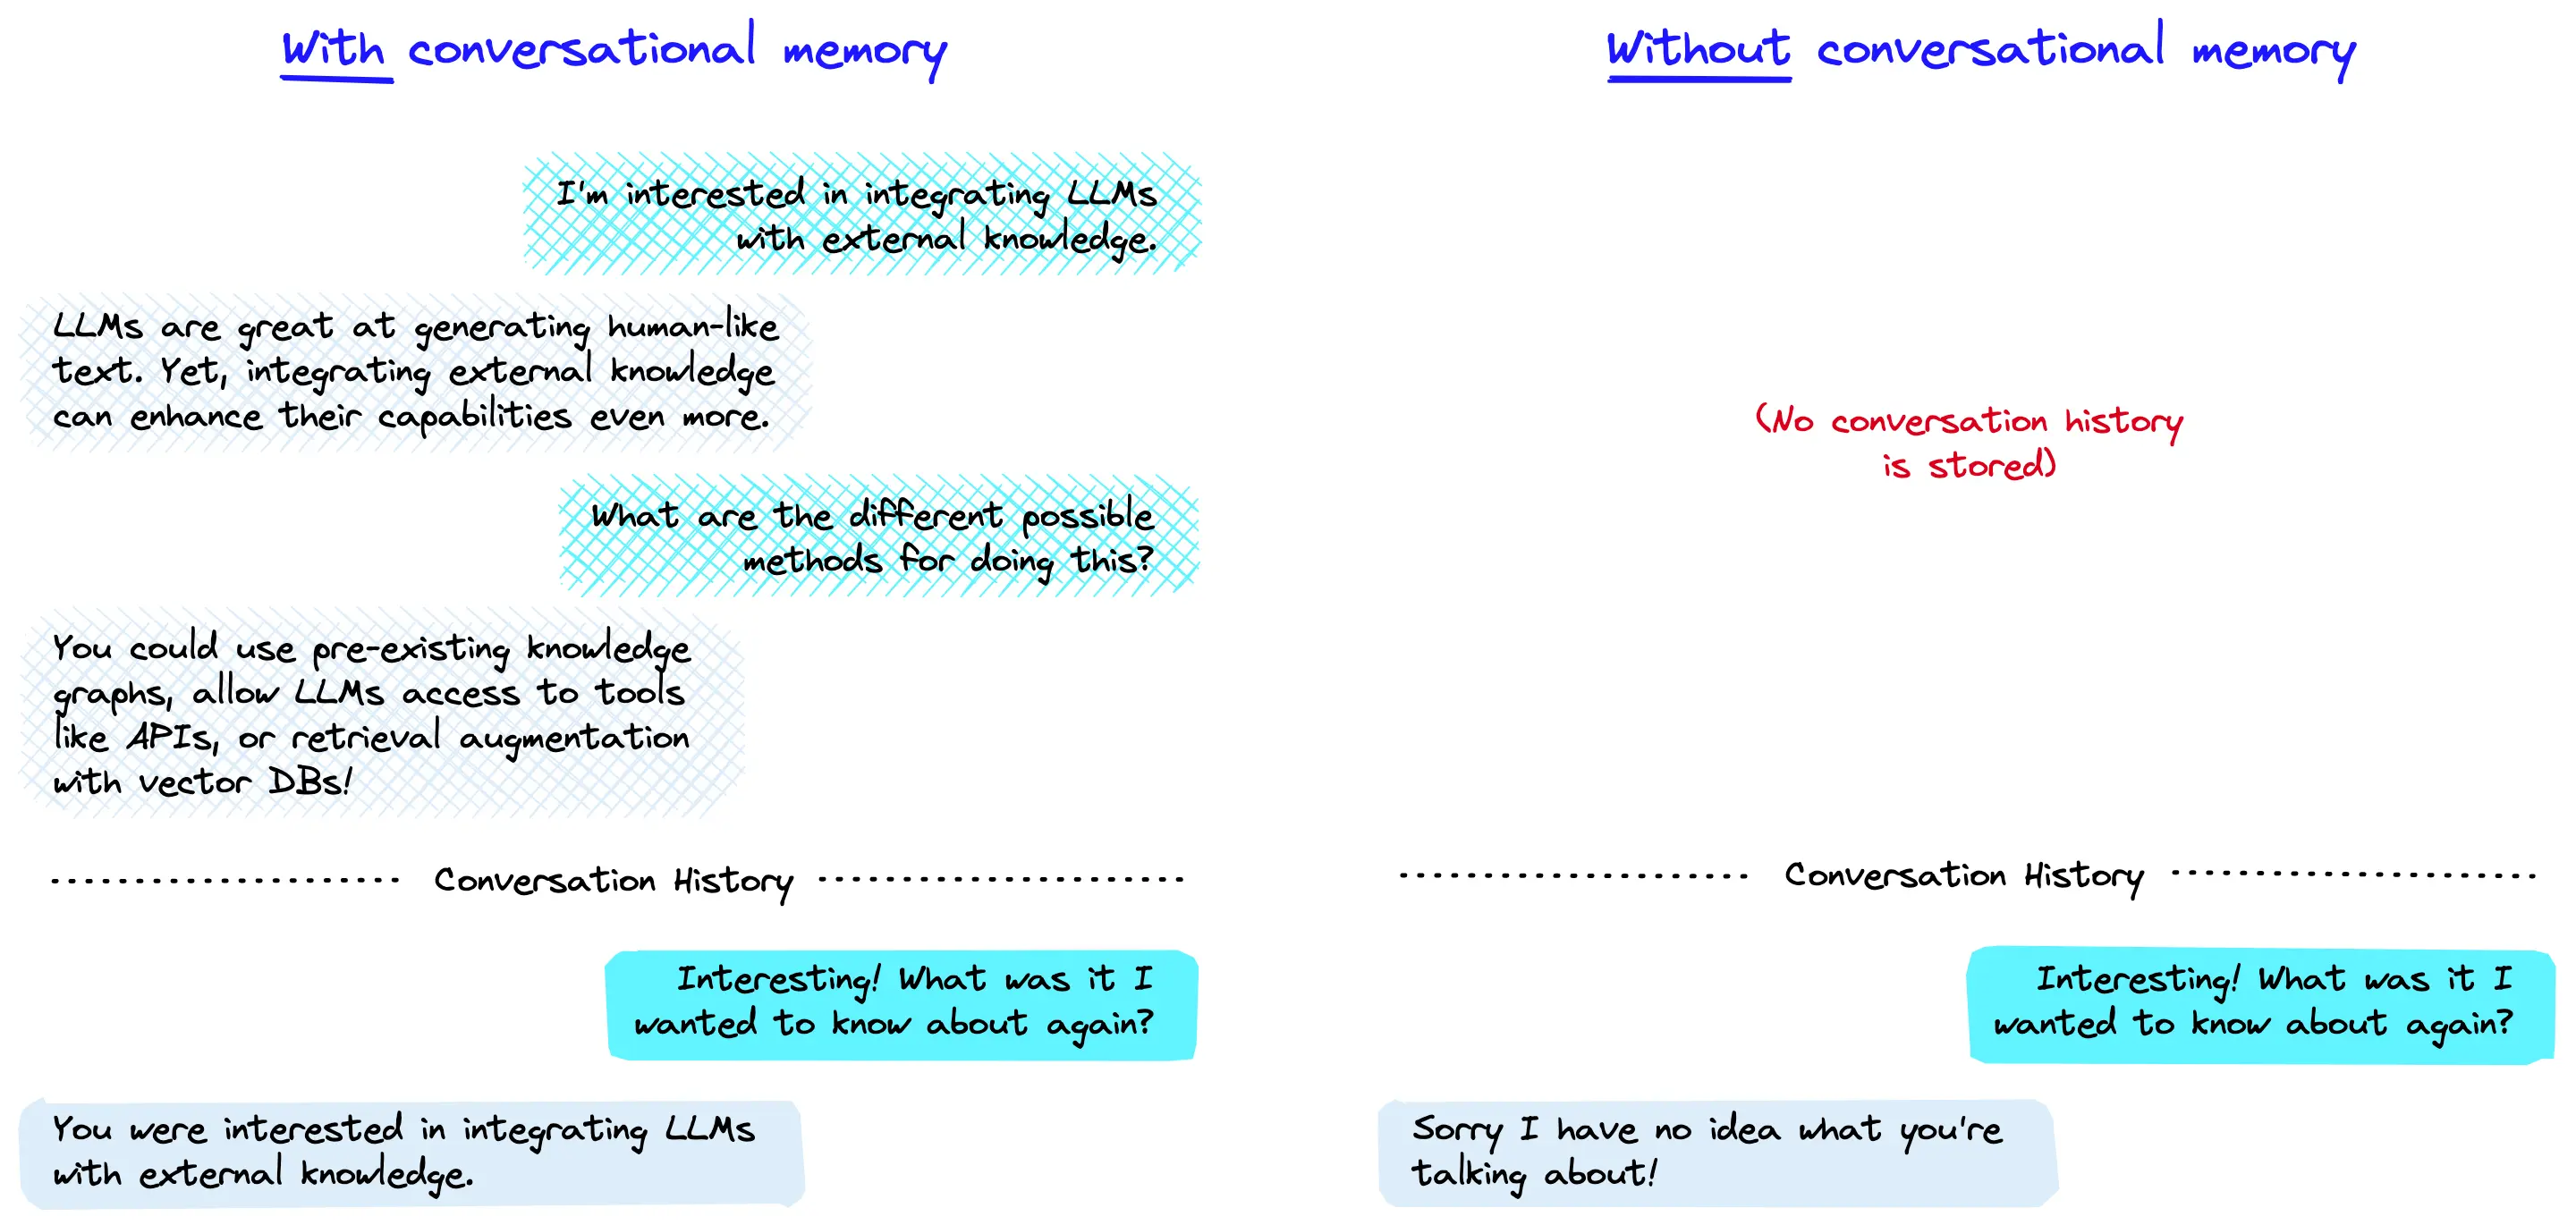

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:

import os
from dotenv import load_dotenv
load_dotenv
GOOGLE_API_KEY=os.getenv('GEMINI_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-1.0-pro",convert_system_message_to_human=True)

In [4]:

print(model.invoke("hi").content)

Hello there, how can I assist you today?


In [5]:
print(model.invoke("hi, how are you please tell me?").content)

I am doing well, thank you for asking. I am an artificial intelligence assistant designed to help you with a wide range of tasks and questions. How may I assist you today?


In [6]:
from langchain.memory import ConversationBufferMemory

In [7]:
memory = ConversationBufferMemory()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15692\995385594.py:1: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory()


In [10]:
memory.save_context({"input": "Hi"},
                    {"output": "What's up ?"})

In [11]:

memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up\nHuman: Hi\nAI: What's up ?"}

conversation buffer memory

In [12]:
memory2 = ConversationBufferMemory(return_messages=True)

In [13]:
memory2.save_context({"input": "Hi"},
                    {"output": "What's up"})

In [14]:

memory2.load_memory_variables({})

{'history': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}),
  AIMessage(content="What's up", additional_kwargs={}, response_metadata={})]}

In [15]:

from langchain.chains import ConversationChain

In [16]:
conversation = ConversationChain(llm=model,verbose=True,memory=ConversationBufferMemory())

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15692\2263270236.py:1: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use :meth:`~RunnableWithMessageHistory: https://python.langchain.com/v0.2/api_reference/core/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html` instead.
  conversation = ConversationChain(llm=model,verbose=True,memory=ConversationBufferMemory())


In [17]:
conversation.predict(input="Hi there!")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi there!
AI:

> Finished chain.


"Hello! It's nice to meet you. How can I help you today?"

In [18]:
conversation.predict(input="Nothing much! Just tell me how do a conversation with an AI ?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there!
AI: Hello! It's nice to meet you. How can I help you today?
Human: Nothing much! Just tell me how do a conversation with an AI ?
AI:

> Finished chain.


'* **Be clear and concise.** AI is not mind-reading. The more specific you are about your questions and requests, the better the AI can understand and help you.\n* **Be patient.** AI is still under development, and there are some things that it cannot do yet. If the AI does not know the answer to your question, it will tell you.\n* **Be polite.** AI is not a human being, but it is still capable of understanding and responding to politeness. Be respectful and kind, and the AI will be more likely to help you.\n* **Have fun!** Talking to an AI can be a lot of fun. Be creative and ask the AI questions about anything you want.'

In [19]:

conversation.predict(input="how many tips are there can you mention in the numbers")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there!
AI: Hello! It's nice to meet you. How can I help you today?
Human: Nothing much! Just tell me how do a conversation with an AI ?
AI: * **Be clear and concise.** AI is not mind-reading. The more specific you are about your questions and requests, the better the AI can understand and help you.
* **Be patient.** AI is still under development, and there are some things that it cannot do yet. If the AI does not know the answer to your question, it will tell you.
* **Be polite.** AI is not a human being, but it is still capable of understanding and responding to politeness. Be respectful and kind, and the AI will be more likely to help you.
* **Have fun!** T

'There are 4 tips:\n1. **Be clear and concise.**\n2. **Be patient.**\n3. **Be polite.**\n4. **Have fun!**'

In [20]:
conversation.memory.chat_memory.messages

[HumanMessage(content='Hi there!', additional_kwargs={}, response_metadata={}),
 AIMessage(content="Hello! It's nice to meet you. How can I help you today?", additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Nothing much! Just tell me how do a conversation with an AI ?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='* **Be clear and concise.** AI is not mind-reading. The more specific you are about your questions and requests, the better the AI can understand and help you.\n* **Be patient.** AI is still under development, and there are some things that it cannot do yet. If the AI does not know the answer to your question, it will tell you.\n* **Be polite.** AI is not a human being, but it is still capable of understanding and responding to politeness. Be respectful and kind, and the AI will be more likely to help you.\n* **Have fun!** Talking to an AI can be a lot of fun. Be creative and ask the AI questions about anything you want.', additional_kwa

In [21]:
conversation.predict(input="can you give me the 3rd tip?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there!
AI: Hello! It's nice to meet you. How can I help you today?
Human: Nothing much! Just tell me how do a conversation with an AI ?
AI: * **Be clear and concise.** AI is not mind-reading. The more specific you are about your questions and requests, the better the AI can understand and help you.
* **Be patient.** AI is still under development, and there are some things that it cannot do yet. If the AI does not know the answer to your question, it will tell you.
* **Be polite.** AI is not a human being, but it is still capable of understanding and responding to politeness. Be respectful and kind, and the AI will be more likely to help you.
* **Have fun!** T

'The 3rd tip is: **Be polite.**'

ConversationBufferWindowMemory

In [22]:
from langchain.memory import ConversationBufferWindowMemory

k = number of window from last conversation only saved in memory

In [23]:

window_memory = ConversationBufferWindowMemory(k=1) # k = number of window from last conversation here it is 1 will be saved
# in memory

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15692\2860143503.py:1: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  window_memory = ConversationBufferWindowMemory(k=1)


In [24]:
window_memory.save_context(
    {"input": "Hi"},
    {"output": "What's up"}
)

In [25]:
window_memory.save_context(
    {"input": "Not much, just hanging"},
    {"output": "Cool"}
)

In [26]:
window_memory.load_memory_variables({})

{'history': 'Human: Not much, just hanging\nAI: Cool'}

In [27]:

window_memory = ConversationBufferWindowMemory( k=2, return_messages=True) # last two conversation windows will be saved in memory

In [28]:

window_memory.save_context(
    {"input": "Hi"},
    {"output": "What's up"}
)
window_memory.save_context(
    {"input": "Not much, just hanging"},
    {"output": "Cool"}
)
window_memory.save_context(
    {"input": "ok thanks "},
    {"output": "great thankyou"}
)

In [29]:

window_memory.load_memory_variables({})

{'history': [HumanMessage(content='Not much, just hanging', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Cool', additional_kwargs={}, response_metadata={}),
  HumanMessage(content='ok thanks ', additional_kwargs={}, response_metadata={}),
  AIMessage(content='great thankyou', additional_kwargs={}, response_metadata={})]}

In [30]:
conversation_window = ConversationChain(
    llm=model,
    memory=window_memory,
    verbose=True
)

In [31]:

conversation_window.predict(input="Hi, what's up?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
[HumanMessage(content='Not much, just hanging', additional_kwargs={}, response_metadata={}), AIMessage(content='Cool', additional_kwargs={}, response_metadata={}), HumanMessage(content='ok thanks ', additional_kwargs={}, response_metadata={}), AIMessage(content='great thankyou', additional_kwargs={}, response_metadata={})]
Human: Hi, what's up?
AI:

> Finished chain.


'Not much, just hanging'

In [32]:

conversation_window.predict(input="how we can talk with AI give me 5 points")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
[HumanMessage(content='ok thanks ', additional_kwargs={}, response_metadata={}), AIMessage(content='great thankyou', additional_kwargs={}, response_metadata={}), HumanMessage(content="Hi, what's up?", additional_kwargs={}, response_metadata={}), AIMessage(content='Not much, just hanging', additional_kwargs={}, response_metadata={})]
Human: how we can talk with AI give me 5 points
AI:

> Finished chain.


'1. **Natural language processing (NLP)**: AI systems use NLP to understand and generate human language. This allows them to communicate with humans in a natural way, using text or speech.\n2. **Machine learning (ML)**: ML algorithms allow AI systems to learn from data and improve their performance over time. This enables them to adapt to different communication styles and preferences.\n3. **Conversational AI (CAI)**: CAI systems are specifically designed to engage in conversations with humans. They use a combination of NLP, ML, and other techniques to understand the intent of human utterances and generate appropriate responses.\n4. **Dialogue management**: Dialogue management systems control the flow of a conversation. They track the state of the conversation, manage turn-taking, and decide when to ask questions, provide information, or end the conversation.\n5. **Speech recognition and synthesis**: Speech recognition systems allow AI systems to understand spoken language. Speech synt

In [33]:

conversation_window.predict(input="what is a allows AI to 'see' and 'interpret' images?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
[HumanMessage(content="Hi, what's up?", additional_kwargs={}, response_metadata={}), AIMessage(content='Not much, just hanging', additional_kwargs={}, response_metadata={}), HumanMessage(content='how we can talk with AI give me 5 points', additional_kwargs={}, response_metadata={}), AIMessage(content='1. **Natural language processing (NLP)**: AI systems use NLP to understand and generate human language. This allows them to communicate with humans in a natural way, using text or speech.\n2. **Machine learning (ML)**: ML algorithms allow AI systems to learn from data and improve their performance over time. This enables them to adapt to different communication styles and

'Computer vision'

In [34]:

conversation_window.predict(input="can you tell me how many tips you genearte in the previous to previous message?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
[HumanMessage(content='how we can talk with AI give me 5 points', additional_kwargs={}, response_metadata={}), AIMessage(content='1. **Natural language processing (NLP)**: AI systems use NLP to understand and generate human language. This allows them to communicate with humans in a natural way, using text or speech.\n2. **Machine learning (ML)**: ML algorithms allow AI systems to learn from data and improve their performance over time. This enables them to adapt to different communication styles and preferences.\n3. **Conversational AI (CAI)**: CAI systems are specifically designed to engage in conversations with humans. They use a combination of NLP, ML, and other tec

'5'

In [35]:
conversation.predict(input="what was the fifth number tips?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi there!
AI: Hello! It's nice to meet you. How can I help you today?
Human: Nothing much! Just tell me how do a conversation with an AI ?
AI: * **Be clear and concise.** AI is not mind-reading. The more specific you are about your questions and requests, the better the AI can understand and help you.
* **Be patient.** AI is still under development, and there are some things that it cannot do yet. If the AI does not know the answer to your question, it will tell you.
* **Be polite.** AI is not a human being, but it is still capable of understanding and responding to politeness. Be respectful and kind, and the AI will be more likely to help you.
* **Have fun!** T

'There is no fifth tip. There are only 4 tips.'

Conversation Entity Memory

In [36]:
from langchain.memory import ConversationEntityMemory

In [37]:

memory = ConversationEntityMemory(llm=model)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15692\3847817190.py:1: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationEntityMemory(llm=model)
d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\pydantic\main.py:212: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)


In [38]:

_input = {"input": "Deven & Sam are working on a hackathon project"}

In [39]:

memory.load_memory_variables(_input)

{'history': '', 'entities': {'Deven': '', 'Sam': ''}}

In [40]:

memory.save_context(
    _input,
    {"output": " That sounds like a great project! What kind of project are they working on?"}
)

In [41]:

memory.load_memory_variables({"input": 'who is Sam'})

{'history': 'Human: Deven & Sam are working on a hackathon project\nAI:  That sounds like a great project! What kind of project are they working on?',
 'entities': {'Sam': 'Sam is working on a hackathon project with Deven.'}}

In [42]:

memory = ConversationEntityMemory(llm=model, return_messages=True)

In [43]:
memory

ConversationEntityMemory(chat_memory=InMemoryChatMessageHistory(messages=[]), return_messages=True, llm=ChatGoogleGenerativeAI(model='models/gemini-1.0-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001216C902F10>, default_metadata=(), convert_system_message_to_human=True), entity_store=InMemoryEntityStore(store={}))

In [44]:


memory.load_memory_variables(_input)

{'history': [], 'entities': {'Deven': '', 'Sam': ''}}

In [45]:
from langchain.chains import ConversationChain

In [46]:
from langchain.memory import ConversationEntityMemory

In [47]:
from langchain.memory.prompt import ENTITY_MEMORY_CONVERSATION_TEMPLATE

In [48]:
from pydantic import BaseModel

In [49]:
from typing import List, Dict, Any

In [50]:

conversation = ConversationChain(
    llm=model,
    verbose=True,
    prompt=ENTITY_MEMORY_CONVERSATION_TEMPLATE,
    memory=ConversationEntityMemory(llm=model)
)

In [51]:
conversation.predict(input="Deven & Sam are working on a hackathon project")



> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

"That's great! Hackathons are a fantastic way to learn new skills, collaborate with others, and build innovative projects. What kind of project are Deven and Sam working on?"

In [53]:
conversation.memory.entity_store.store

{'Deven': 'Deven is working on a hackathon project with Sam.',
 'Sam': 'Sam is currently working on a hackathon project with Deven.'}

In [54]:
conversation.predict(input="They are trying to add more complex memory structures to Langchain")



> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

"That's an ambitious project! Langchain is a relatively new language model, so adding more complex memory structures could significantly enhance its capabilities. How are Deven and Sam planning to approach this challenge?"

In [55]:
conversation.predict(input="They are adding in a key-value store for entities mentioned so far in the conversation.")



> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

"That's a clever approach. By adding a key-value store for entities mentioned in the conversation, Deven and Sam can provide Langchain with a way to track and remember important information over time. This could greatly improve the model's ability to understand and respond to complex conversations."

In [56]:

conversation.predict(input="What do you know about Deven & Sam?")



> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

"Based on the information provided, I know that Deven and Sam are currently working together on a hackathon project. They are attempting to add more complex memory structures to Langchain, a relatively new language model. To achieve this, they are incorporating a key-value store to track and remember important entities mentioned throughout a conversation. This approach could significantly enhance Langchain's ability to understand and respond to complex conversations."

In [57]:

from pprint import pprint
pprint(conversation.memory.entity_store.store)

{'Deven': 'Deven is working on a hackathon project with Sam, and they are '
          'attempting to add more complex memory structures to Langchain, a '
          'relatively new language model.',
 'Langchain': 'Langchain is a relatively new language model that Deven and Sam '
              'are working to enhance by adding more complex memory '
              'structures.',
 'Sam': 'Sam is currently working on a hackathon project with Deven. They are '
        'attempting to add more complex memory structures to Langchain, a '
        'relatively new language model.'}


In [58]:


conversation.predict(input="Sam is the founder of a company called Daimon.")



> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

"That's interesting to know! It's great that Sam is using his expertise to contribute to the development of Langchain. Daimon sounds like a promising company, and I'm sure Sam's work on Langchain will be a valuable asset to its success."

In [59]:

from pprint import pprint # prity print
pprint(conversation.memory.entity_store.store)

{'Daimon': 'Daimon is a company founded by Sam.',
 'Deven': 'Deven is working on a hackathon project with Sam, and they are '
          'attempting to add more complex memory structures to Langchain, a '
          'relatively new language model.',
 'Langchain': 'Langchain is a relatively new language model that Deven and Sam '
              'are working to enhance by adding more complex memory '
              'structures.',
 'Sam': 'Sam is currently working on a hackathon project with Deven. They are '
        'attempting to add more complex memory structures to Langchain, a '
        'relatively new language model. Sam is also the founder of a company '
        'called Daimon.'}


In [60]:
conversation.predict(input="What do you know about Sam?")



> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

'Based on the information provided, I know that Sam is currently working on a hackathon project with Deven. They are attempting to add more complex memory structures to Langchain, a relatively new language model. Additionally, Sam is the founder of a company called Daimon.'